Saving 1 McDonald's.pdf-all_items_item_5.txt to 1 McDonald's.pdf-all_items_item_5 (8).txt
Saving 3 KFC.pdf-all_items_item_5.txt to 3 KFC.pdf-all_items_item_5 (8).txt
Saving 4 Burger King.pdf-all_items_item_5.txt to 4 Burger King.pdf-all_items_item_5 (8).txt
Saving 5 Ace Hardware.pdf-all_items_item_5.txt to 5 Ace Hardware.pdf-all_items_item_5 (8).txt
Saving 6 Chick-fil-A.pdf-all_items_item_5.txt to 6 Chick-fil-A.pdf-all_items_item_5 (8).txt
Saving 7 Subway.pdf-all_items_item_5.txt to 7 Subway.pdf-all_items_item_5 (8).txt
Saving 8 Domino's.pdf-all_items_item_5.txt to 8 Domino's.pdf-all_items_item_5 (8).txt
Saving 9 Circle K.pdf-all_items_item_5.txt to 9 Circle K.pdf-all_items_item_5 (8).txt
Saving 10 Taco Bell.pdf-all_items_item_5.txt to 10 Taco Bell.pdf-all_items_item_5 (8).txt
Saving 11 Wendy's.pdf-all_items_item_5.txt to 11 Wendy's.pdf-all_items_item_5 (8).txt
Saving 12 Pizza Hut.pdf-all_items_item_5.txt to 12 Pizza Hut.pdf-all_items_item_5 (8).txt
Saving 13 REMAX.pdf-all_items_item_5

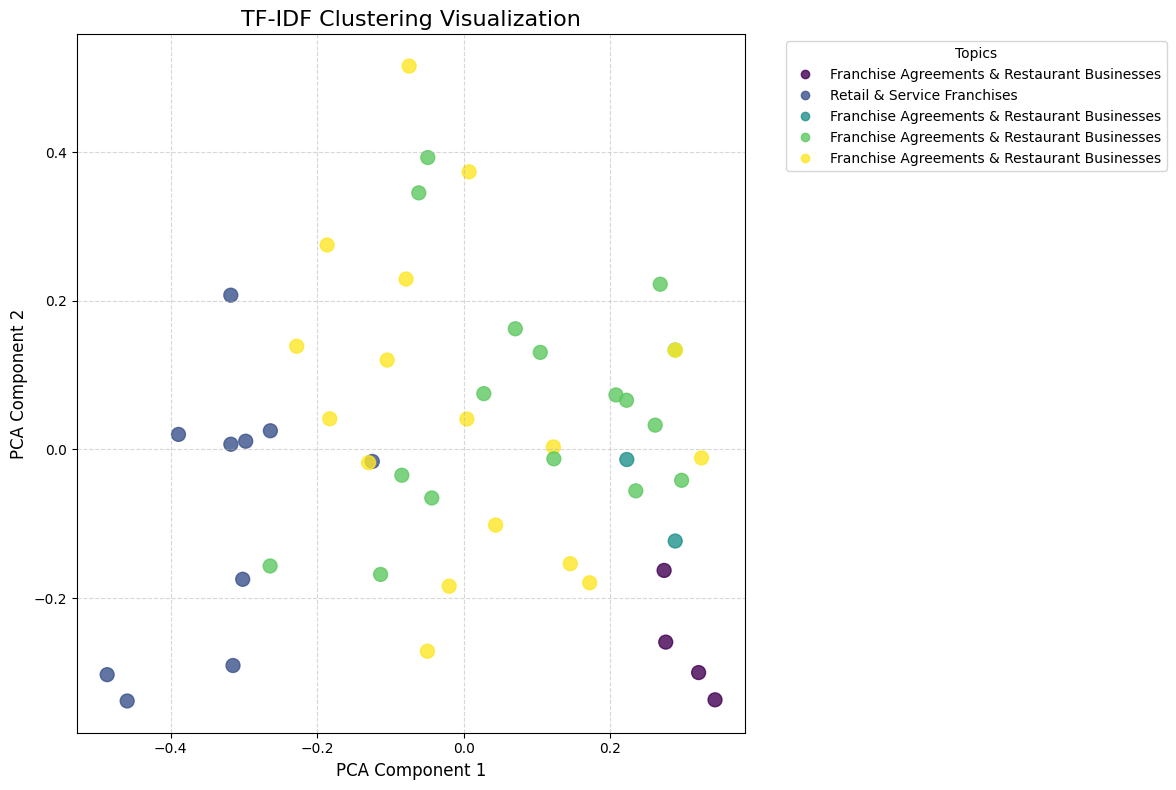


Interpretation of TF-IDF Clusters:
Franchise Agreements & Restaurant Businesses:
  - Files: ["1 McDonald's.pdf-all_items_item_5 (8).txt", '3 KFC.pdf-all_items_item_5 (8).txt', '9 Circle K.pdf-all_items_item_5 (8).txt', "11 Wendy's.pdf-all_items_item_5 (8).txt", '12 Pizza Hut.pdf-all_items_item_5 (8).txt', '13 REMAX.pdf-all_items_item_5 (8).txt', "14 Dunkin'.pdf-all_items_item_5 (8).txt", '16 Tim Hortons.pdf-all_items_item_5 (8).txt', '19 Dairy Queen.pdf-all_items_item_5 (8).txt', "26 Chili's.pdf-all_items_item_5 (8).txt", '30 Berkshire Hathaway.pdf-all_items_item_5 (8).txt', "36 Denny's.pdf-all_items_item_5 (8).txt", "41 Hardee's.pdf-all_items_item_5 (8).txt", '45 Zaxbys.pdf-all_items_item_5 (8).txt', "46 Carl's Jr..pdf-all_items_item_5 (8).txt", '52 Midas.pdf-all_items_item_5 (8).txt', '54 Homevesters.pdf-all_items_item_5 (8).txt']
  - Top Terms: ['franchise', 'fee', 'initial', 'restaurant', 'agreement', 'development', 'pay', 'training', 'franchised', 'shop']

Franchise Agreements & 

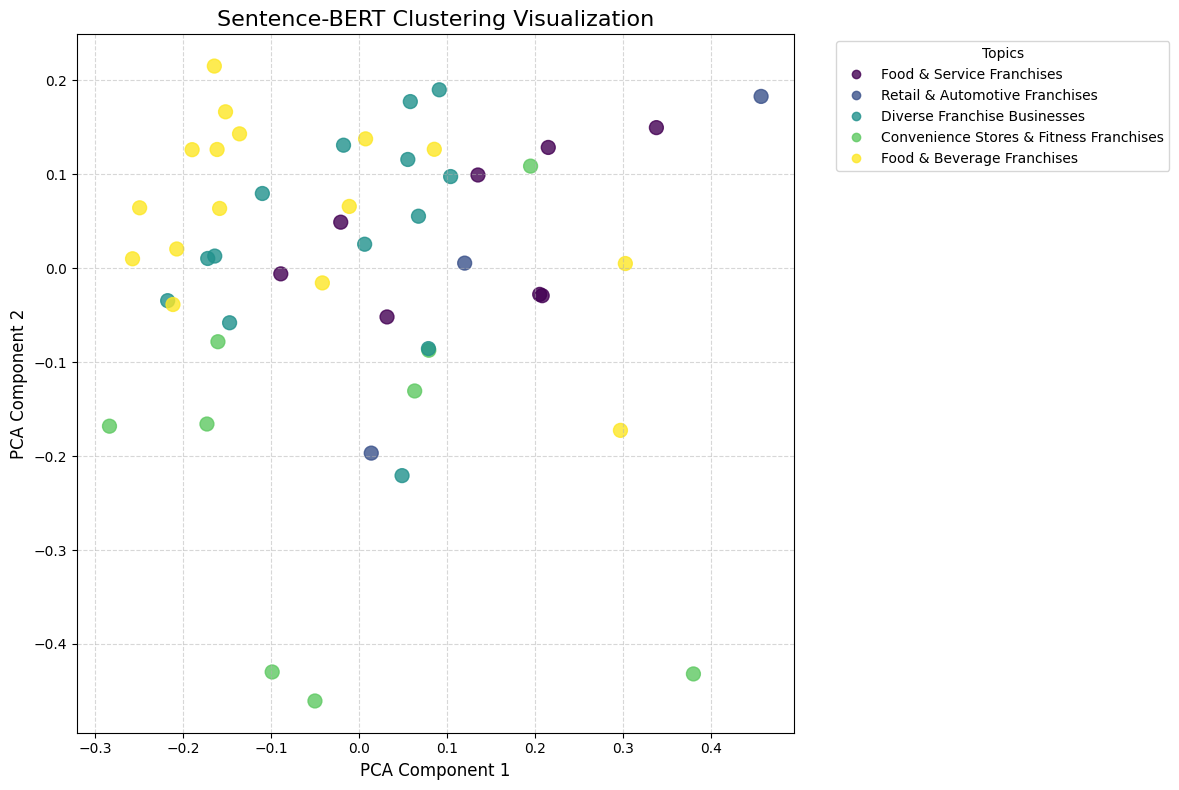


Interpretation of Embedding Clusters:
Diverse Franchise Businesses:
  - Files: ["1 McDonald's.pdf-all_items_item_5 (8).txt", '3 KFC.pdf-all_items_item_5 (8).txt', '4 Burger King.pdf-all_items_item_5 (8).txt', '7 Subway.pdf-all_items_item_5 (8).txt', "11 Wendy's.pdf-all_items_item_5 (8).txt", '13 REMAX.pdf-all_items_item_5 (8).txt', '15 Keller Williams.pdf-all_items_item_5 (8).txt', '18 Popeyes Louisiana Kitchen.pdf-all_items_item_5 (8).txt', '24 Applebees.pdf-all_items_item_5 (8).txt', '25 Express Employment Professionals.pdf-all_items_item_5 (8).txt', "37 Culver's.pdf-all_items_item_5 (8).txt", '44 Home Instead.pdf-all_items_item_5 (8).txt', "46 Carl's Jr..pdf-all_items_item_5 (8).txt", '54 Homevesters.pdf-all_items_item_5 (8).txt']

Retail & Automotive Franchises:
  - Files: ['5 Ace Hardware.pdf-all_items_item_5 (8).txt', '31 The UPS Store.pdf-all_items_item_5 (8).txt', '52 Midas.pdf-all_items_item_5 (8).txt']

Food & Beverage Franchises:
  - Files: ['6 Chick-fil-A.pdf-all_items_ite

In [8]:
# Import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from collections import defaultdict
from google.colab import files

# Step 1: Preprocessing
def preprocess_text(text):
    # Basic preprocessing (you can expand this as needed)
    text = text.lower()  # Lowercase
    text = "".join([char for char in text if char.isalnum() or char.isspace()])  # Remove punctuation
    return text

# Step 2: Load and preprocess all files
def load_files(file_paths):
    documents = []
    for file_path in file_paths:
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()
            processed_text = preprocess_text(text)
            documents.append(processed_text)
    return documents

# Step 3: Frequency-Based Method (TF-IDF)
def tfidf_method(documents):
    vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")
    tfidf_matrix = vectorizer.fit_transform(documents)
    return tfidf_matrix, vectorizer

# Step 4: Embedding Method (Sentence-BERT)
def embedding_method(documents):
    model = SentenceTransformer('all-MiniLM-L6-v2')  # Pre-trained model
    embeddings = model.encode(documents)
    return embeddings

# Step 5: Topic Modeling (K-Means Clustering)
def perform_clustering(data, num_topics=5):
    kmeans = KMeans(n_clusters=num_topics, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters

# Step 6: Assign files to topics
def assign_files_to_topics(file_paths, clusters):
    topic_to_files = defaultdict(list)
    for file_path, cluster in zip(file_paths, clusters):
        topic_to_files[cluster].append(file_path)
    return topic_to_files

# Step 7: Extract top terms for TF-IDF topics
def extract_top_terms(tfidf_matrix, vectorizer, clusters, num_terms=10):
    terms = vectorizer.get_feature_names_out()
    top_terms_per_topic = {}
    for topic in set(clusters):
        topic_indices = np.where(clusters == topic)[0]
        topic_tfidf = tfidf_matrix[topic_indices].mean(axis=0).A1
        top_term_indices = topic_tfidf.argsort()[-num_terms:][::-1]
        top_terms = [terms[i] for i in top_term_indices]
        top_terms_per_topic[topic] = top_terms
    return top_terms_per_topic

# Step 8: Assign meaningful names to topics
def assign_topic_names(topic_to_files, top_terms_per_topic=None):
    topic_names = {}
    for topic, files in topic_to_files.items():
        if top_terms_per_topic:  # For TF-IDF topics
            top_terms = top_terms_per_topic[topic]
            if "franchise" in top_terms and "restaurant" in top_terms:
                topic_names[topic] = "Franchise Agreements & Restaurant Businesses"
            elif "development" in top_terms and "target" in top_terms:
                topic_names[topic] = "Restaurant Development & Franchise Targets"
            elif "store" in top_terms and "products" in top_terms:
                topic_names[topic] = "Retail & Service Franchises"
            elif "fee" in top_terms and "agreement" in top_terms:
                topic_names[topic] = "Franchise Development & Agreements"
            elif "incentive" in top_terms and "traditional" in top_terms:
                topic_names[topic] = "Restaurant Development & Incentives"
            else:
                topic_names[topic] = f"Topic {topic}"  # Default name
        else:  # For embedding topics
            if any("McDonald's" in file or "KFC" in file for file in files):
                topic_names[topic] = "Diverse Franchise Businesses"
            elif any("Ace Hardware" in file or "Midas" in file for file in files):
                topic_names[topic] = "Retail & Automotive Franchises"
            elif any("Chick-fil-A" in file or "Pizza Hut" in file for file in files):
                topic_names[topic] = "Food & Beverage Franchises"
            elif any("Circle K" in file or "Planet Fitness" in file for file in files):
                topic_names[topic] = "Convenience Stores & Fitness Franchises"
            elif any("Tim Hortons" in file or "Jiffy Lube" in file for file in files):
                topic_names[topic] = "Food & Service Franchises"
            else:
                topic_names[topic] = f"Topic {topic}"  # Default name
    return topic_names

# Step 9: Enhanced Visualize clusters
def visualize_clusters(data, clusters, method_name, topic_names=None):
    # Reduce dimensions for visualization (2D)
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Plot clusters
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap="viridis", s=100, alpha=0.8)

    # Add legend with topic names
    if topic_names:
        handles, labels = scatter.legend_elements()
        legend_labels = [topic_names[i] for i in range(len(labels))]
        plt.legend(handles, legend_labels, title="Topics", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Add title and labels
    plt.title(f"{method_name} Clustering Visualization", fontsize=16)
    plt.xlabel("PCA Component 1", fontsize=12)
    plt.ylabel("PCA Component 2", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

# Step 10: Main function (updated to include enhanced visualizations and interpretations)
def main(file_paths, num_topics=5):
    # Load and preprocess files
    documents = load_files(file_paths)

    # Frequency-Based Method (TF-IDF)
    tfidf_matrix, vectorizer = tfidf_method(documents)
    tfidf_clusters = perform_clustering(tfidf_matrix, num_topics)

    # Extract top terms for TF-IDF topics
    tfidf_top_terms = extract_top_terms(tfidf_matrix, vectorizer, tfidf_clusters)

    # Assign files to topics
    tfidf_topic_to_files = assign_files_to_topics(file_paths, tfidf_clusters)

    # Assign meaningful names to TF-IDF topics
    tfidf_topic_names = assign_topic_names(tfidf_topic_to_files, tfidf_top_terms)

    # Visualize TF-IDF clusters with enhanced visualization
    visualize_clusters(tfidf_matrix.toarray(), tfidf_clusters, "TF-IDF", tfidf_topic_names)

    # Interpretation of TF-IDF Clusters
    print("\nInterpretation of TF-IDF Clusters:")
    for topic, name in tfidf_topic_names.items():
        print(f"{name}:")
        print(f"  - Files: {tfidf_topic_to_files[topic]}")
        print(f"  - Top Terms: {tfidf_top_terms[topic]}")
        print()

    # Embedding Method (Sentence-BERT)
    embeddings = embedding_method(documents)
    embedding_clusters = perform_clustering(embeddings, num_topics)

    # Assign files to topics
    embedding_topic_to_files = assign_files_to_topics(file_paths, embedding_clusters)

    # Assign meaningful names to embedding topics
    embedding_topic_names = assign_topic_names(embedding_topic_to_files)

    # Visualize embedding clusters with enhanced visualization
    visualize_clusters(embeddings, embedding_clusters, "Sentence-BERT", embedding_topic_names)

    # Interpretation of Embedding Clusters
    print("\nInterpretation of Embedding Clusters:")
    for topic, name in embedding_topic_names.items():
        print(f"{name}:")
        print(f"  - Files: {embedding_topic_to_files[topic]}")
        print()

    # Return results
    return tfidf_topic_to_files, tfidf_topic_names, embedding_topic_to_files, embedding_topic_names

# Step 11: Upload files to Google Colab
uploaded = files.upload()

# Get the list of uploaded file names
file_paths = list(uploaded.keys())

# Print file paths to verify
print("Files uploaded:", file_paths)

# Step 12: Run the main function
if __name__ == "__main__":
    # Set the number of topics (you can adjust this)
    num_topics = 5

    # Run the main function
    tfidf_topics, tfidf_topic_names, embedding_topics, embedding_topic_names = main(file_paths, num_topics)